In [20]:
from IPython.display import Latex
from math import sin,cos, atan, pi, log10, sqrt, tan
import pandas as pd
from matplotlib import pyplot as plt
from functools import reduce

In [21]:
def f(x):
    return 1 / (2 + x ** 3)

In [22]:
def get_interpolation_net(a, b, step):
    count = int((b - a) / step)
    return [a + (b - a) * i / count for i in range(count+1)]

def get_check_net(interpolation_net):
    check_net = []
    for i, _ in enumerate(interpolation_net):
        if i == len(interpolation_net) - 1:
            break
        check_net.append(interpolation_net[i] + (interpolation_net[i+1] - interpolation_net[i]) / 2)
    return check_net

def rectangle(f, a, b, step):
    x_arr = get_check_net(get_interpolation_net(a, b, step))
    return sum(map(lambda x: step*x, map(f, x_arr)))bv

In [23]:
def elem_trapezio(a, b, step):
    return (f(b) + f(a)) / 2 * step

def trapezio(f, a, b, step):
    x_arr = get_interpolation_net(a, b, step)
    arr = []
    for i, _ in enumerate(x_arr):
        if i + 1 >= len(x_arr):
            break
        arr.append(elem_trapezio(x_arr[i], x_arr[i+1], step))
    return sum(arr)

In [24]:
def elem_gauss(a,b,step):
    f_ = (b - a) / 2
    x1 = (b - a) / sqrt(3)
    x2 =  (a + b) / 2
    f_ *= (f(x2 - x1) + f(x2 + x1))
    
def gauss(f, a, b, step):
    x_arr = get_interpolation_net(a, b, step)
    arr = []
    for i, _ in enumerate(x_arr):
        if i + 1 >= len(x_arr):
            break
        arr.append(elem_gauss(x_arr[i], x_arr[i+1], step))
    return sum(arr)

In [25]:
def elem_simpson(a, b):
    return (b - a) / 6 * (f(a) + 4 * f((a + b) / 2) + f(b))
    
def simpson(f, a, b, step):
    x_arr = get_interpolation_net(a, b, step)
    arr = []
    for i, _ in enumerate(x_arr):
        if i + 1 >= len(x_arr):
            break
        arr.append(elem_simpson(x_arr[i], x_arr[i+1]))
    return sum(arr)

In [26]:
def integral(x):
    first = -1 * log10(2 ** (1 / 3) * x ** 2 - 2 ** (2 / 3) * x + 2)
    second = 2 * log10(2 ** (2 / 3)) * x + 2
    third = 2 * sqrt(3) * tan((2 ** (2 / 3) * x - 1) / sqrt(3))
    return (first + second + third) / (6 * 2 ** (2/3))

def get_integr(a, b):
    return integral(b) - integral(a)

In [27]:
def get_df(a, b, steps):
    integr = 1.04154
    simps = [abs(integr - simpson(f, a, b, step)) for step in steps]
    trap = [abs(integr - trapezio(f, a, b, step)) for step in steps]
    rect = [abs(integr - rectangle(f, a, b, step)) for step in steps]
    gauss = [abs(integr - simpson(f, a, b, step)) for step in steps]
    print(integr)
    return pd.DataFrame(data={'simpson': simps, 'trapezio': trap,
                              'rectangle': rect, 'steps': steps, 'gauss': gauss}, columns=['simpson', 'trapezio', 'rectangle', 'steps', 'gauss'])

In [28]:
df = get_df(-1, 1, [10 ** (-i) for i in range(5)])
df

1.04154


,simpson,trapezio,rectangle,steps,gauss
0,1.662993e-02,1.251267e-01,3.761843e-02,1.0000,1.662993e-02
1,9.413029e-06,2.186585e-03,1.079173e-03,0.1000,9.413029e-06
2,5.182556e-07,2.273567e-05,1.059045e-05,0.0100,5.182556e-07
3,5.172936e-07,7.395153e-07,4.061827e-07,0.0010,5.172936e-07
4,5.172935e-07,5.195157e-07,5.161824e-07,0.0001,5.172935e-07


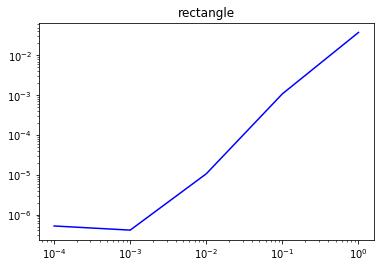

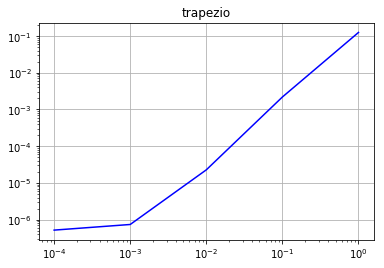

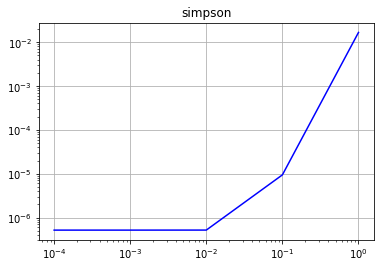

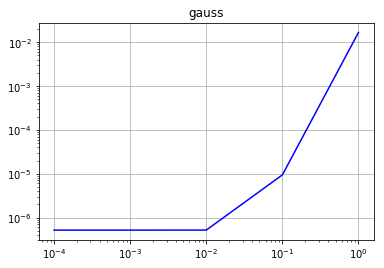

In [29]:
h = df['steps']
plt.xscale('log')
plt.yscale('log')
plt.title("rectangle")
plt.figure(1)
plt.plot(
    h,
    df["rectangle"],
    'b',
)

plt.figure(2)
plt.plot(
    h,
    df["trapezio"],
    'b',
)
plt.xscale('log')
plt.yscale('log')
plt.title("trapezio")
plt.grid(True)
plt.figure(3)
plt.plot(
    h,
    df['simpson'],
    'b',
)
plt.xscale('log')
plt.yscale('log')
plt.title("simpson")
plt.grid(True)
plt.figure(4)
plt.plot(
    h,
    df['gauss'],
    'b',
)
plt.xscale('log')
plt.yscale('log')
plt.title("gauss")
plt.grid(True)

In [32]:
print(df.T[1])

simpson      0.000009
trapezio     0.002187
rectangle    0.001079
steps        0.100000
gauss        0.000009
Name: 1, dtype: float64
